In [238]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### 1. Простейшие фильтры, matplotlib

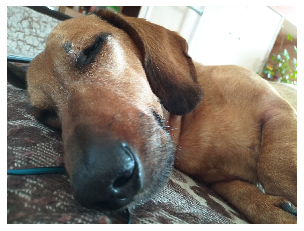

In [239]:
img_1 = np.array(plt.imread('photo.jpg'))
plt.imshow(img_1); 
plt.axis('off');

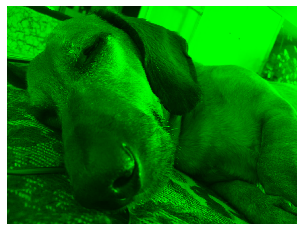

In [222]:
img_1 = np.array(plt.imread('photo.jpg'))
img_1[:, :, [0, 2]] = 0
plt.imshow(img_1)
plt.axis('off')
plt.show()

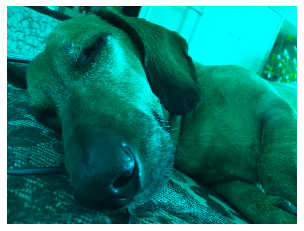

In [223]:
img_1 = np.array(plt.imread('photo.jpg'))
img_1[:, :, 0] = 0
plt.imshow(img_1)
plt.axis('off')

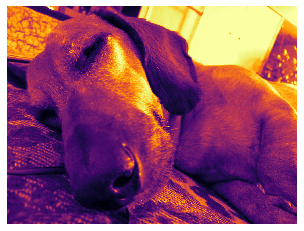

In [224]:
img_1 = np.array(plt.imread('photo.jpg'))
plt.imshow(img_1.mean(2), cmap='inferno')
plt.axis('off')

### 2. PIL

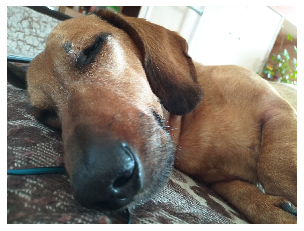

In [225]:
img = Image.open('photo.jpg')
plt.imshow(img);
plt.axis('off');

### *2.1. Изменение яркости*

Умножаем все значения пикселей на параметр **bright**. Если он меньше 1 - яркость уменьшается, если больше 1 - увеличивается

In [226]:
def bright_changing(image, bright):
    image_bright = image.copy()
    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row))
            
            # умножаем все значения пикселя на число bright
            r = int(r * bright)
            g = int(g * bright)
            b = int(b * bright)
            
            image_bright.putpixel((col, row), (r, g, b))
            
    return image_bright
            

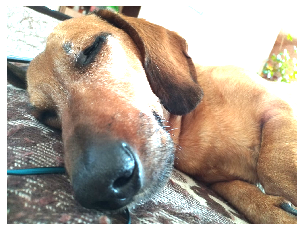

In [227]:
plt.imshow(bright_changing(img, 1.5));
plt.axis('off');

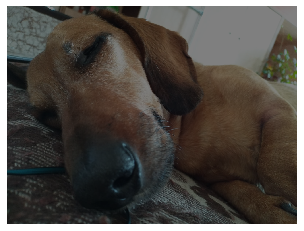

In [228]:
plt.imshow(bright_changing(img, 0.5));
plt.axis('off');

### *2.2 Черно-белое изображение*

Устанавливаем некий порог суммы трех каналов: если сумма выше порога "закрашиваем" пиксель черным, если ниже - белым. 
Здесь параметр bright должен быть от 0 до 1, чем он больше, тем выше порог

In [229]:
def black_and_white(image, bright):
    image_bw = image.copy()
    threshold = 255 * bright
    
    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row))
            
            if r + g + b > threshold:
                image_bw.putpixel((col, row), (0, 0, 0))
            else:
                image_bw.putpixel((col, row), (255, 255, 255))
                
    return image_bw

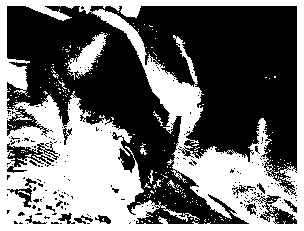

In [186]:
plt.imshow(black_and_white(img, 0.95));
plt.axis('off');

### *2.3 Контрастность*

Чтобы дообавить цвета в изображение, не меняя при этом соотношение между цветами, будем увеличивать не значение пикселя, а его отклонение от среднего значения по всем пикселям.  
Здесь параметр **n** - это коэффициент, который показывает, во сколько раз мы будем увеличивать отклонения значений пикселя от среднего. 

In [230]:
def contrasting(image, n):
    image_contrast = image.copy()
    sum_of_pixels = 0
    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row))
            sum_of_pixels += (r + g + b) / 3
    average = sum_of_pixels / (np.array(image).shape[0] * np.array(image).shape[1])

    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row))
        
            delta_r = n * (r - average)
            delta_g = n * (g - average)
            delta_b = n * (b - average)
        
            image_contrast.putpixel((col, row), \
                (int(average + delta_r), int(average + delta_g), int(average + delta_b)))
            
    return image_contrast

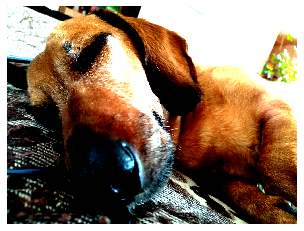

In [231]:
plt.imshow(contrasting(img, 2.5));
plt.axis('off');

Можно задавать свой коэффициент для каждого канала, что дает больше возможностей для редактирования цвета:

In [232]:
def contrasting_by_color(image, n_red, n_green, n_blue):
    image_contrast = image.copy()
    sum_of_pixels = 0
    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row))
            sum_of_pixels += (r + g + b) / 3
    average = sum_of_pixels / (np.array(image).shape[0] * np.array(image).shape[1])

    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row))
        
            delta_r = n_red * (r - average)
            delta_g = n_green * (g - average)
            delta_b = n_blue * (b - average)
        
            image_contrast.putpixel((col, row), \
                (int(average + delta_r), int(average + delta_g), int(average + delta_b)))
            
    return image_contrast

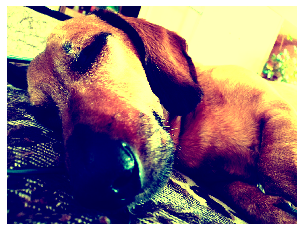

In [233]:
plt.imshow(contrasting_by_color(img, 3, 3, 0.5));
plt.axis('off');

### *2.4 Серый и сепия*

Сначала сделаем изображение серым. Мы вольпользуемся простым способом - усреднение значений каждого пикселя:

In [234]:
def gray(image):
    img_gray = image.copy()
    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row)) 

            img_gray.putpixel((col, row), (int((r + g + b) / 3), \
                                           int((r + g + b) / 3), int((r + g + b) / 3)))
    return img_gray

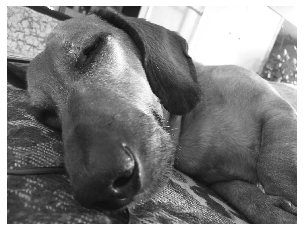

In [235]:
plt.imshow(gray(img));
plt.axis('off');

Теперь сделаем то же самое, но в каждому пикселю будем добавлять значения цвета сепия - (112, 60, 20):

In [240]:
def sepia(image):
    img_sep = image.copy()
    for row in range(np.array(image).shape[0]):
        for col in range(np.array(image).shape[1]):
            r, g, b = image.getpixel((col, row)) 

            img_sep.putpixel((col, row), (int((r + g + b) / 3) + 112, \
                                           int((r + g + b) / 3) + 60, int((r + g + b) / 3) + 20))
    return img_sep

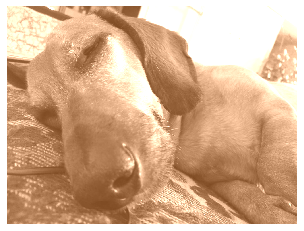

In [241]:
plt.imshow(sepia(img));
plt.axis('off');